# Car Pricing Data Exploration

This notebook provides a comprehensive exploration of the car pricing dataset.

## 1. Load and Import Libraries

In [15]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Environment variables for data paths
DATA_DIR = os.getenv("DATA_DIR", "../data")
DATA_FILE = os.getenv("DATA_FILE", "car_pricing_amjad_zhour.csv")
DATA_PATH = os.path.join(DATA_DIR, DATA_FILE)

# Load data
print(f"Loading data from: {DATA_PATH}")
df = pd.read_csv(DATA_PATH)
print("Data loaded successfully!")

Loading data from: ../data/car_pricing_amjad_zhour.csv
Data loaded successfully!


## 2. First Look at the Data

In [16]:
print("--- FIRST 5 ROWS ---")
print(df.head())

--- FIRST 5 ROWS ---
    Make    Model  Year  Engine Size  Mileage Fuel Type Transmission  \
0  Honda  Model B  2015          3.9    74176    Petrol       Manual   
1   Ford  Model C  2014          1.7    94799  Electric    Automatic   
2    BMW  Model B  2006          4.1    98385  Electric       Manual   
3  Honda  Model B  2015          2.6    88919  Electric    Automatic   
4  Honda  Model C  2004          3.4   138482    Petrol    Automatic   

          Price  
0  30246.207931  
1  22785.747684  
2  25760.290347  
3  25638.003491  
4  21021.386657  


## 3. Column Information and Data Types

In [17]:
print("--- COLUMN INFORMATION (Data Types) ---")
df.info()

--- COLUMN INFORMATION (Data Types) ---
<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   str    
 1   Model         1000 non-null   str    
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   str    
 6   Transmission  1000 non-null   str    
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), str(4)
memory usage: 62.6 KB


## 4. Missing Values Analysis

In [18]:
null_counts = df.isnull().sum()
print("--- NULL VALUES COUNT ---")
print(null_counts)

--- NULL VALUES COUNT ---
Make            0
Model           0
Year            0
Engine Size     0
Mileage         0
Fuel Type       0
Transmission    0
Price           0
dtype: int64


In [19]:
# Detailed analysis of missing values
null_percentage = (df.isnull().sum() / len(df)) * 100
null_info = pd.DataFrame(
    {"Missing Count": null_counts, "Missing Percentage": null_percentage}
)
print("--- DETAILED MISSING VALUES ANALYSIS ---")
print(null_info[null_info["Missing Count"] > 0])

--- DETAILED MISSING VALUES ANALYSIS ---
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


In [20]:
# Visualization of missing values
if df.isnull().sum().sum() > 0:
    print("Generating missing values heatmap...")
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap="viridis")
    plt.title("Missing Values Map (White = Missing Value)")
    plt.tight_layout()
    plt.show()
else:
    print("✓ No missing values in the dataset!")

✓ No missing values in the dataset!


## 5. Numerical Statistics

In [21]:
print("--- NUMERICAL STATISTICS ---")
print(df.describe())

--- NUMERICAL STATISTICS ---
              Year  Engine Size       Mileage         Price
count  1000.000000  1000.000000    1000.00000   1000.000000
mean   2010.688000     2.798300   97192.48700  25136.615530
std       6.288577     1.024137   59447.31576   5181.401368
min    2000.000000     1.000000      56.00000   6704.953524
25%    2005.000000     1.900000   44768.75000  21587.878370
50%    2011.000000     2.800000   94411.50000  25189.325247
75%    2016.000000     3.700000  148977.75000  28806.368974
max    2021.000000     4.500000  199867.00000  41780.504635


## 6. Categorical Columns Analysis

In [22]:
# Analysis of categorical columns (Important for One-Hot Encoding!)
categorical_cols = ["Make", "Model", "Fuel_Type", "Transmission"]
print("--- UNIQUE VALUES IN CATEGORICAL COLUMNS ---")
for col in categorical_cols:
    if col in df.columns:
        print(f"\nColumn '{col}':")
        print(df[col].value_counts())

--- UNIQUE VALUES IN CATEGORICAL COLUMNS ---

Column 'Make':
Make
Ford      225
Audi      212
Honda     198
Toyota    187
BMW       178
Name: count, dtype: int64

Column 'Model':
Model
Model B    212
Model C    205
Model A    202
Model D    197
Model E    184
Name: count, dtype: int64

Column 'Transmission':
Transmission
Manual       511
Automatic    489
Name: count, dtype: int64


## 7. Correlation Analysis

In [23]:
# Check correlation (What affects the price?)
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=["number"])
correlation = numeric_df.corr()["Price"].sort_values(ascending=False)

print("--- CORRELATION WITH PRICE ---")
print(correlation)

--- CORRELATION WITH PRICE ---
Price          1.000000
Year           0.609631
Engine Size    0.383951
Mileage       -0.556560
Name: Price, dtype: float64


## 8. Scatter Matrices by Categorical Variables

Generating pairplot for: Make


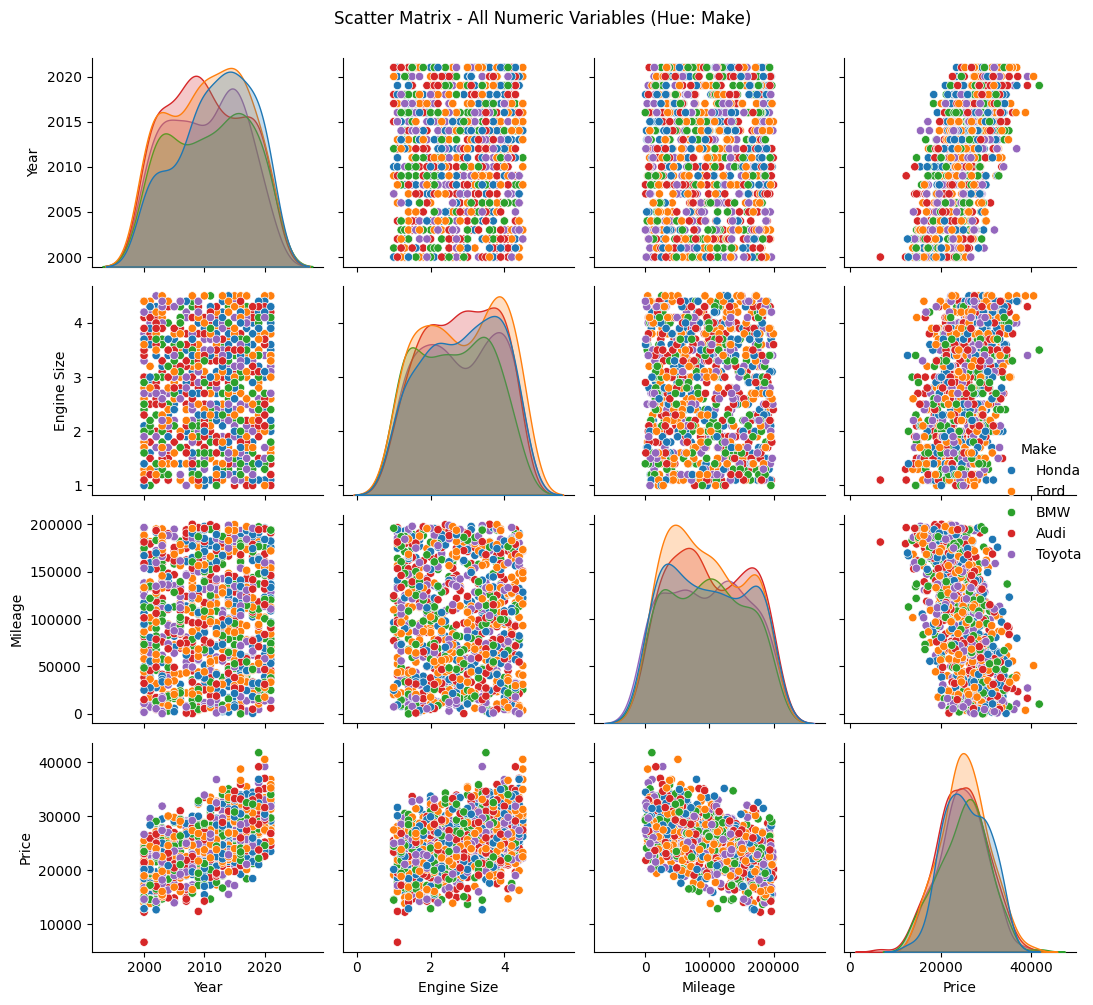

In [24]:
# Scatter matrix for Make
print("Generating pairplot for: Make")
sns.pairplot(
    numeric_df.assign(Make=df["Make"]),
    hue="Make",
    height=2.5,
    aspect=1,
)
plt.suptitle("Scatter Matrix - All Numeric Variables (Hue: Make)", y=1.00)
plt.tight_layout()
plt.show()

Generating pairplot for: Model


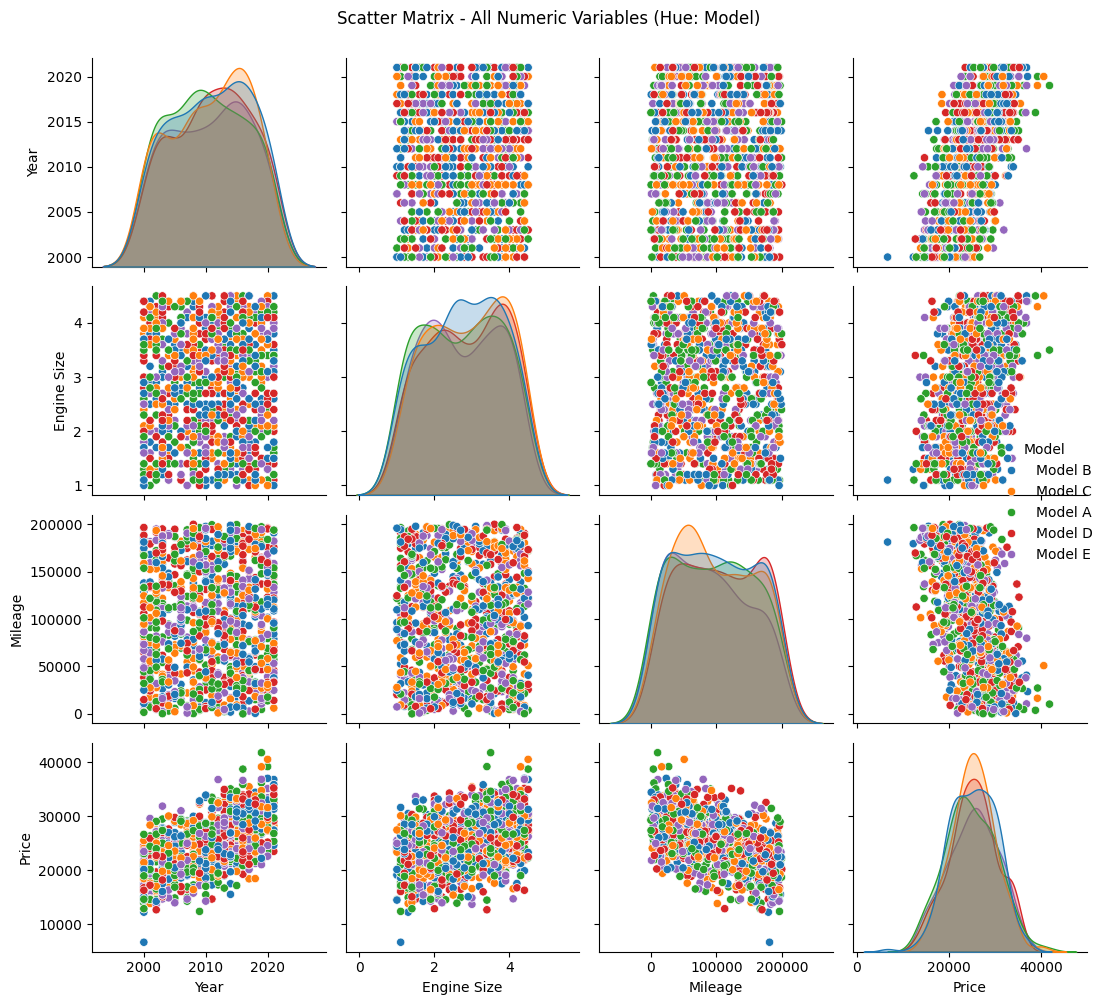

In [25]:
# Scatter matrix for Model
print("Generating pairplot for: Model")
sns.pairplot(
    numeric_df.assign(Model=df["Model"]),
    hue="Model",
    height=2.5,
    aspect=1,
)
plt.suptitle("Scatter Matrix - All Numeric Variables (Hue: Model)", y=1.00)
plt.tight_layout()
plt.show()

Generating pairplot for: Fuel_Type


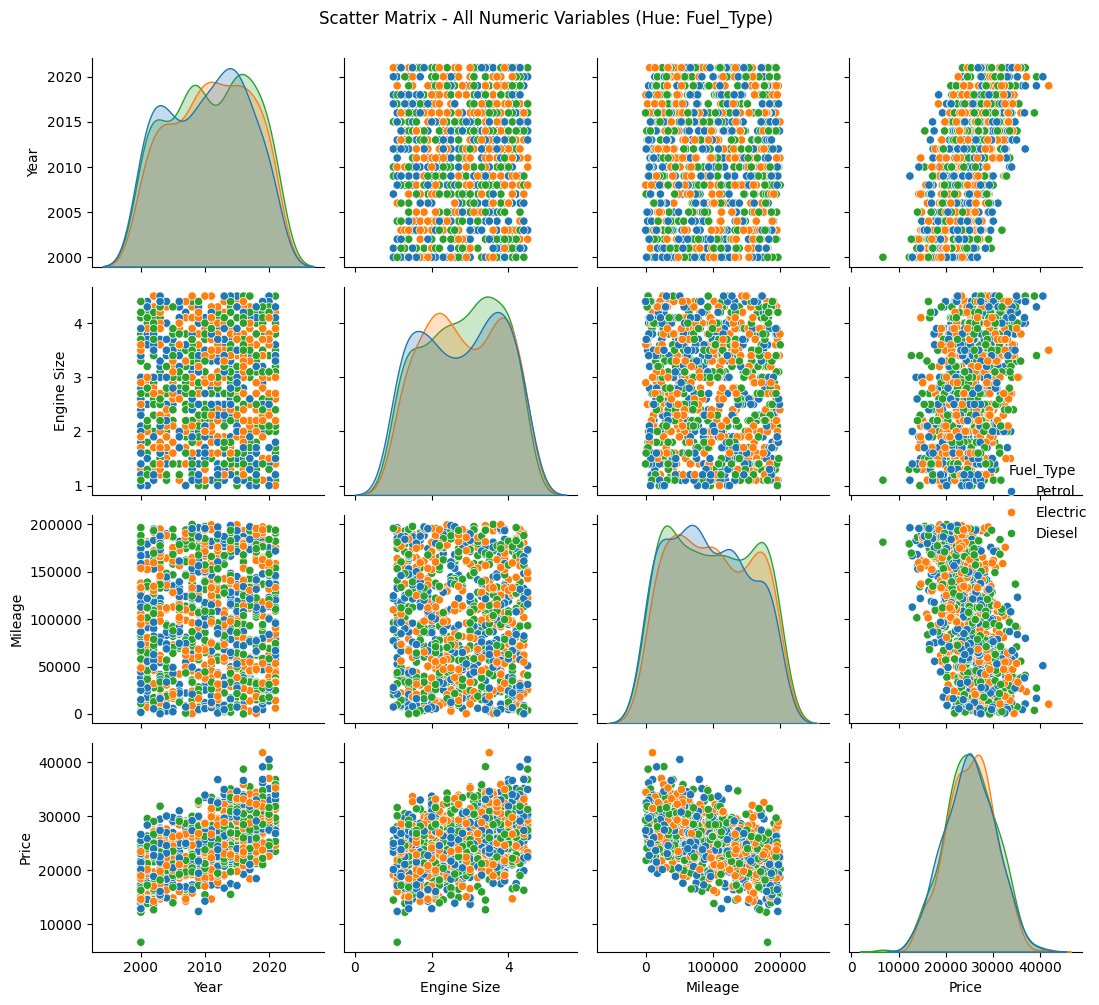

In [26]:
# Scatter matrix for Fuel_Type
print("Generating pairplot for: Fuel_Type")
sns.pairplot(
    numeric_df.assign(Fuel_Type=df["Fuel Type"]),
    hue="Fuel_Type",
    height=2.5,
    aspect=1,
)
plt.suptitle("Scatter Matrix - All Numeric Variables (Hue: Fuel_Type)", y=1.00)
plt.tight_layout()
plt.show()

Generating pairplot for: Transmission


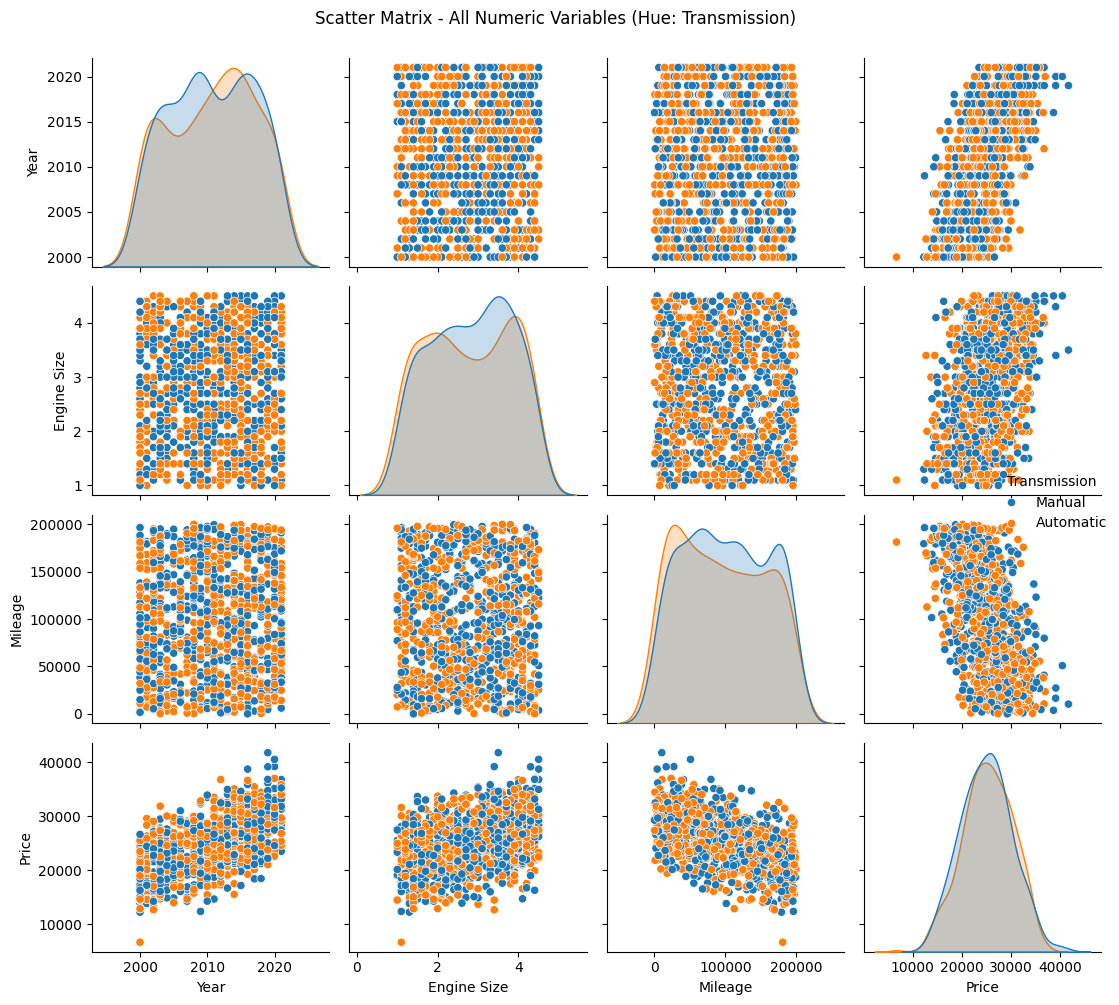

In [27]:
# Scatter matrix for Transmission
print("Generating pairplot for: Transmission")
sns.pairplot(
    numeric_df.assign(Transmission=df["Transmission"]),
    hue="Transmission",
    height=2.5,
    aspect=1,
)
plt.suptitle("Scatter Matrix - All Numeric Variables (Hue: Transmission)", y=1.00)
plt.tight_layout()
plt.show()

## 9. Price vs Year Analysis

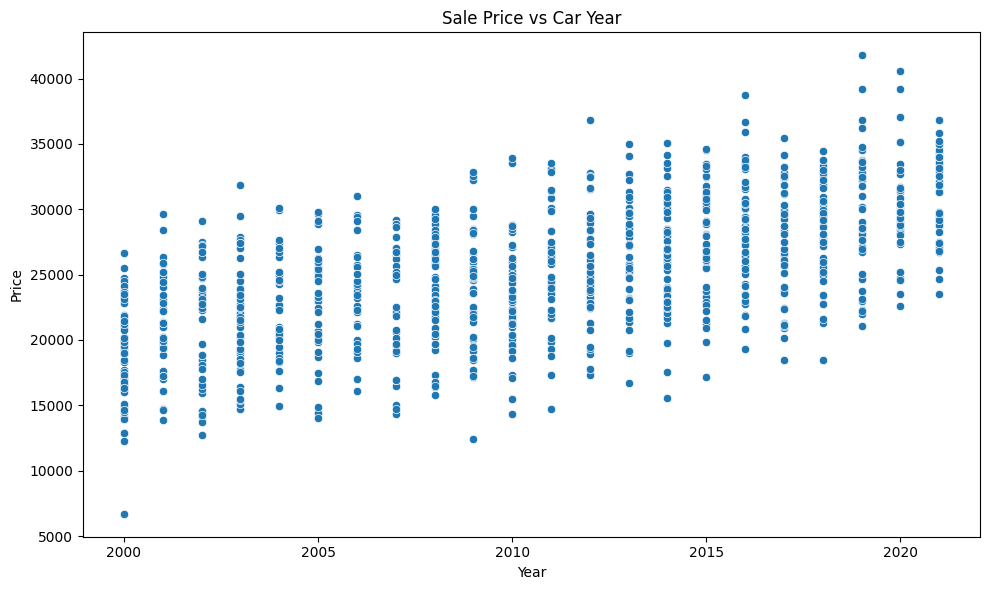

In [28]:
# Quick plot: Price vs Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Year", y="Price", data=df)
plt.title("Sale Price vs Car Year")
plt.tight_layout()
plt.show()